Step count, without probability.

In [11]:
import math
import numpy as np
import random

import matplotlib.pyplot as plt

# Print() and else: are disabled

In [9]:
def fatigue_plot(f):
    steps = 0
    fatigue = f # Does the driver have fatigue?
    
    if fatigue >= 1:
        need_RA = 1 # Need rest area?
    else:
        need_RA = 0
    
    car = [0.0, 1.0, need_RA, fatigue] # x-position, y-position, need rest area, fatigue
    
    def car_print():
        return [round(num, 2) for num in car]
    
    pos_RA_stop = [5.0, 2.0] # Rest area position stop
    pos_RA_in = [4.0, 1.0] # Rest area position in
    pos_RA_out = [6.0, 1.0] # Rest area position out
    
    fin = 10.0 # Finish

    list_step = []
    list_posx = []
    
    #print(f"Initial condition: {car}")
    #print()
    
    while car[0] < fin:
        if car[2] == 1: # Need rest area?
            if ([car[0], car[1]] == pos_RA_in):
                #print("Car is entering rest area")
                car[0] += 1.0
                car[1] += 1.0
            elif [car[0], car[1]] == pos_RA_stop:
                if car[3] > 0:
                    car[3] += -1 # Fatigue reduced by 1
                    #print(f"Car is stopping in rest area, fatigue level: {round(car[3], 2)}")
                    steps += 1
                    list_step.append(steps)
                    list_posx.append(car[0])
                    #print(f"{steps} | Car position: {car_#print()}")
                    continue
                #else:
                    #print("Driver is fully recovered")
                #print("Car is exiting rest area")
                car[2] = 0
                car[0] += 1.0
                car[1] += -1.0
            else:
                car[0] += 1.0 # Velocity of a car is 1.0
        else:
            car[0] += 1.0 # Velocity of a car is 1.0
        steps += 1
        list_step.append(steps)
        list_posx.append(car[0])
        #print(f"{steps} | Car position: {car_#print()}")
    
    #print()
    #print(f"Steps = {steps}")

    return list_posx, list_step

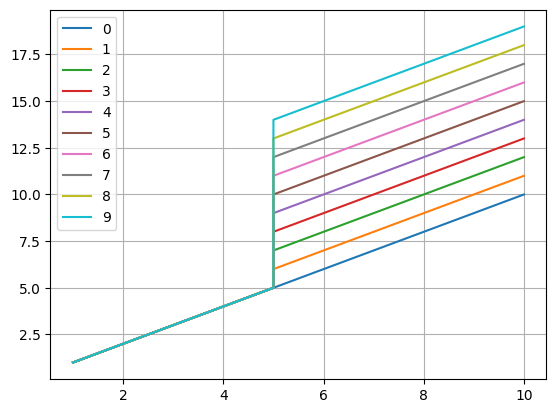

In [21]:
fat_posx = [math.nan] * 10
fat_step = [math.nan] * 10

for i in range(10):
    fat_posx[i] = fatigue_plot(i)[0]
    fat_step[i] = fatigue_plot(i)[1]

for i in range(10):
    plt.plot(fat_posx[i], fat_step[i], label=i)
plt.legend()
plt.grid()
plt.show()

Normal steps = 10 <br>
Every one fatigue level adds one step.

In [ ]:
# x dan y seakan-akan sudah hafal
# Coba pakai 10 kendaraan
# Coba pakai probabilistic untuk fatigue (untuk masuk dan untuk keluar)
# Nanti bisa variasi pemulihan fatigue
# Coba pikirkan cara mengerem terkait dengan tingkat kelelahan
# Untuk iterasi, harus dilakukan untuk semua mobil
# Apakah ada 2 mobil atau lebih pada 1 titik yang sama
# Mengapa pakai probabilitas untuk komputasi? Agar sulit ditebak

# Distribusi fatigue, jarak tempuh waktu optimum dan kecelakaan sedikit.

Hubungan fatigue dan kecelakaan mobil di jalan tol:
- https://road-safety.transport.ec.europa.eu/european-road-safety-observatory/statistics-and-analysis-archive/fatigue/fatigue-and-crash-risk_en
- ...

Sepertinya perlu definisi jalan tol, rest area, agent-based model.

Selain itu, perlu ada kasus kecelakaan di jalan tol, terutama di Indonesia, sama studi yang berkaitan dengan rasa kantuk (drowsiness, fatigue, dll.) 